In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy import interpolate
from scipy.signal import argrelextrema
import scipy
import statistics
import os
import seaborn as sns

In [ ]:
# global variables/parameters
n = 1000
smoothing_factor = 5000

In [ ]:
# return (velocity, acceleration, jerk, curvature)
def smoothCurveFeature(curve, n, smoothing_factor):
    sx = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[0,:], k=4)
    sy = interpolate.UnivariateSpline(np.arange(curve.shape[1]), curve[1,:], k=4)
    pressure_f = interpolate.UnivariateSpline(np.arange(np.shape(df[3])[0]), np.array(df[3]), k=4)

    # sx.set_smoothing_factor(smoothing_factor)
    # sy.set_smoothing_factor(smoothing_factor)
    # pressure_f.set_smoothing_factor(smoothing_factor)

    sxdot = sx.derivative()
    sydot = sy.derivative()
    
    sxdotdot = sxdot.derivative()
    sydotdot = sydot.derivative()

    sxdotdotdot = sxdotdot.derivative()
    sydotdotdot = sydotdot.derivative()
    
    t = np.linspace(0, curve.shape[1], n)
    new_curve = np.zeros((2, n))
    new_curve[0,:] = sx(t)
    new_curve[1,:] = sy(t)

    #calculate velocity
    velocity = np.sqrt((sydot(t))**2 + (sxdot(t))**2)

    #calculate acceleration
    acceleration = np.sqrt((sydotdot(t))**2 + (sxdotdot(t))**2)

    #calculate jerk
    jerk = np.sqrt((sydotdotdot(t))**2 + (sxdotdotdot(t))**2)
    
    # calculate curvature
    curvature = (sxdot(t) * sydotdot(t) - sydot(t) * sxdotdot(t))/(sxdot(t)**2 + sydot(t)**2)**(3/2)

    pressure = pressure_f(t)
    
    # new_curve: interpolated/transformed curve, curv_spline_eval: curvature, curv_dot_eval: rate of change of curvature
    return velocity, acceleration, jerk, curvature, pressure

In [ ]:
# duration
def duration_calc(timestamps): 
    total_duration = max(timestamps) - min(timestamps)
    return total_duration

# total displacement
def total_displacement_calc(displacement): 
    total_displacement = np.sum(np.array(displacement))
    return total_displacement

In [ ]:
# mean velocity
def velocity_mean(velocity): 
    return np.mean(velocity)

# median velocity
def velocity_median(velocity): 
    return np.median(velocity)

# max velocity
def velocity_max(velocity): 
    return np.max(velocity)

# velocity std
def velocity_std(velocity): 
    return np.std(velocity)

# rate of inversions in velocity (niv)
def velocity_niv(velocity): 
    maximum = argrelextrema(np.array(velocity), np.greater)   
    return len(maximum[0]) / duration_calc(timestamps)

# normal velocity variability
def velocity_nvv(velocity): 
    sigma_sum = 0
    for i in range(1, len(velocity) - 1): 
        sigma_sum += abs(velocity[i+1] - velocity[i])
    T = duration_calc(timestamps)
    nvv = 1/(T * abs(velocity_mean(velocity))) * sigma_sum
    return nvv

In [ ]:
# mean acceleration
def accel_mean(acceleration):
    return np.mean(acceleration)

# max acceleration
def accel_max(acceleration):
    return np.max(acceleration)
    
# median acceleration
def accel_median(acceleration): 
    return np.median(acceleration)

# acceleration std
def accel_std(acceleration):
    return np.std(acceleration)

# rate of inversions in acceleration (nia): 
def accel_nia(acceleration):
    maximum = argrelextrema(np.array(acceleration), np.greater)    
    return len(maximum[0]) / duration_calc(timestamps)

In [ ]:
# mean jerk
def jerk_mean(jerk):
    return np.mean(jerk)

# max jerk
def jerk_max(jerk):
    return np.max(jerk)
    
# median jerk
def jerk_median(jerk): 
    return np.median(jerk)

# jerk std
def jerk_std(jerk):
    return np.std(jerk)

# rate of inversions in jerk (nij) (time-normalized):  
def jerk_nij(jerk):
    maximum = argrelextrema(np.array(jerk), np.greater)    
    return len(maximum[0]) / duration_calc(timestamps)

In [ ]:
# number of inversions in curvature (time-normalized)
def curvature_nic(curvature): 
    maximum = argrelextrema(np.array(curvature), np.greater)    
    return len(maximum[0]) / duration_calc(timestamps)

# true curvature at each point? 

In [ ]:
# mean pressure
def pressure_mean(pressure):
    return np.mean(pressure)

# max pressure
def pressure_max(pressure):
    return np.max(pressure)
    
# median pressure
def pressure_median(pressure): 
    return np.median(pressure)

# pressure std
def pressure_std(pressure):
    return np.std(pressure)
    
# rate of change of pressure inversions
def rip(pressure): 
    maximum = argrelextrema(np.array(pressure), np.greater)    
    return len(maximum[0]) / duration_calc(timestamps)

In [ ]:
df = pd.read_csv('/work/ParkinsonHW/H_P000-0001.txt', sep = ';', header = None)
df_static = df[(df[6] == 0)]
x = df_static[0]
y = df_static[1]
t = df_static[5]
curve = np.array([x, y])
velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n, smoothing_factor)
timestamps = df_static[5]

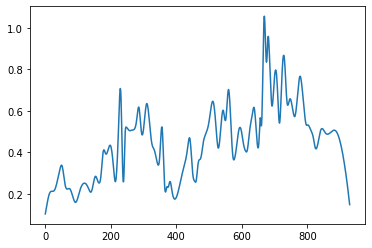

4616


In [ ]:
plt.plot(velocity[50: len(pressure)-20])
plt.show()
print (len(timestamps))

# Static Drawings

In [ ]:
# How much data to exclude on the ends. We want to make the a factor based on the length of the data in each file
EndRemove = 200
# constructs the Pandas DataFrame for gathering all the features 
subject_id = []
mean_vel = []
median_vel = []
max_vel = []
vel_std = []
vel_niv = [] #rate
nvv = [] 
mean_accel = []
max_accel = []
median_accel = []
std_accel = []
nia_accel = [] #rate
mean_jerk = []  
max_jerk = []
median_jerk = []
std_jerk = []
nij = [] #rate
nic = [] #rate
mean_pressure = []
median_pressure = []
max_pressure = []
std_pressure = []
#total_displacement = []
duration = []
category = []
rate_ip = []

# all the control static drawings
for i in range(1, 16): 
    if i < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i) + '.txt', sep = ';', header = None)
    df_static = df[(df[6] == 0)]
    x = df_static[0]
    y = df_static[1]
    t = df_static[5]
    curve = np.array([x, y])
    velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n, smoothing_factor)
    
    # truncating data
    velocity = velocity[100: len(velocity)-100]
    acceleration = acceleration[100:len(acceleration)-100]
    jerk = jerk[100:len(jerk)-100]
    pressure = pressure[100: len(pressure)-100]
    curvature = curvature[100:len(curvature)-100]

    timestamps = df_static[5]
    
    subject_id.append('C' + str(i))

    mean_vel.append(velocity_mean(velocity))
    median_vel.append(velocity_median(velocity))
    max_vel.append(velocity_max(velocity))
    vel_std.append(velocity_std(velocity))
    vel_niv.append(velocity_niv(velocity))
    nvv.append(velocity_nvv(velocity))

    mean_accel.append(accel_mean(acceleration))
    median_accel.append(accel_median(acceleration))
    max_accel.append(accel_max(acceleration))
    std_accel.append(accel_std(acceleration))
    nia_accel.append(accel_nia(acceleration))

    mean_jerk.append(jerk_mean(jerk))
    median_jerk.append(jerk_median(jerk))
    max_jerk.append(jerk_max(jerk))
    std_jerk.append(jerk_std(jerk))
    nij.append(jerk_nij(jerk))

    nic.append(curvature_nic(curvature))

    duration.append(duration_calc(timestamps))
    #total_displacement.append(total_displacement_calc(displacement))

    mean_pressure.append(pressure_mean(pressure))
    max_pressure.append(pressure_max(pressure))
    median_pressure.append(pressure_median(pressure))
    std_pressure.append(pressure_std(pressure))
    rate_ip.append(rip(pressure))

    category.append(0)

# all the PD static drawings 
directory = os.fsencode('/work/ParkinsonHW')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    if filename[0] == 'P' or filename[0] == 'H': 
        path = os.path.join('/work/ParkinsonHW', filename)
        df = pd.read_csv(path, sep = ';', header = None)
        
        if 0 not in list(df[6]):
            continue
        df_static = df[(df[6]==0)]
        x = df_static[0]
        y = df_static[1]
        t = df_static[5]
        curve = np.array([x, y])
        velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n, smoothing_factor)
        timestamps = df_static[5]


        #velocity = velocity[10: len(velocity)-100]
        #acceleration = acceleration[30:len(acceleration)-50]
        #jerk = jerk[30:len(jerk)-50]
        #pressure = pressure[100: len(pressure)-20]

        velocity = velocity[100: len(velocity)-100]
        acceleration = acceleration[100:len(acceleration)-100]
        jerk = jerk[100:len(jerk)-100]
        pressure = pressure[100: len(pressure)-100]
        curvature = curvature[100:len(curvature)-100]
        subject_id.append(filename[:-4])

        mean_vel.append(velocity_mean(velocity))
        median_vel.append(velocity_median(velocity))
        max_vel.append(velocity_max(velocity))
        vel_std.append(velocity_std(velocity))
        vel_niv.append(velocity_niv(velocity))
        nvv.append(velocity_nvv(velocity))

        mean_accel.append(accel_mean(acceleration))
        median_accel.append(accel_median(acceleration))
        max_accel.append(accel_max(acceleration))
        std_accel.append(accel_std(acceleration))
        nia_accel.append(accel_nia(acceleration))

        mean_jerk.append(jerk_mean(jerk))
        median_jerk.append(jerk_median(jerk))
        max_jerk.append(jerk_max(jerk))
        std_jerk.append(jerk_std(jerk))
        nij.append(jerk_nij(jerk))

        nic.append(curvature_nic(curvature))

        duration.append(duration_calc(timestamps))
        #total_displacement.append(total_displacement_calc(displacement))

        mean_pressure.append(pressure_mean(pressure))
        max_pressure.append(pressure_max(pressure))
        median_pressure.append(pressure_median(pressure))
        std_pressure.append(pressure_std(pressure))
        rate_ip.append(rip(pressure))

        # 1 meaning patient data
        category.append(1)

features_df_static = pd.DataFrame({
    'Subject ID': subject_id,
    'Category' : category,
    'Mean Velocity': mean_vel, 'Velocity Std': vel_std, 'Peak Velocity': max_vel, 'NVV': nvv, 'NIV': vel_niv, 
    'Mean Acceleration': mean_accel, 'Acceleration Std': std_accel, 'Peak Acceleration': max_accel, 'NIA': nia_accel, 
    'Mean Jerk': mean_jerk, 'Jerk Std': std_jerk, 'Max Jerk': max_jerk, 'NIJ': nij, 
    'NIC': nic, 
    'Duration': duration, 
    #'Total Displacement': total_displacement, 
    'Mean Pressure': mean_pressure, 'Median Pressure': median_pressure, 'Peak Pressure': max_pressure, 'Pressure Std': std_pressure, 'Rate of Inversion in Pressure': rate_ip
    }) 

In [ ]:
filename = 'lengthData_static_HW_features.csv'
features_df_static.to_csv (filename, index = False, header=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes 

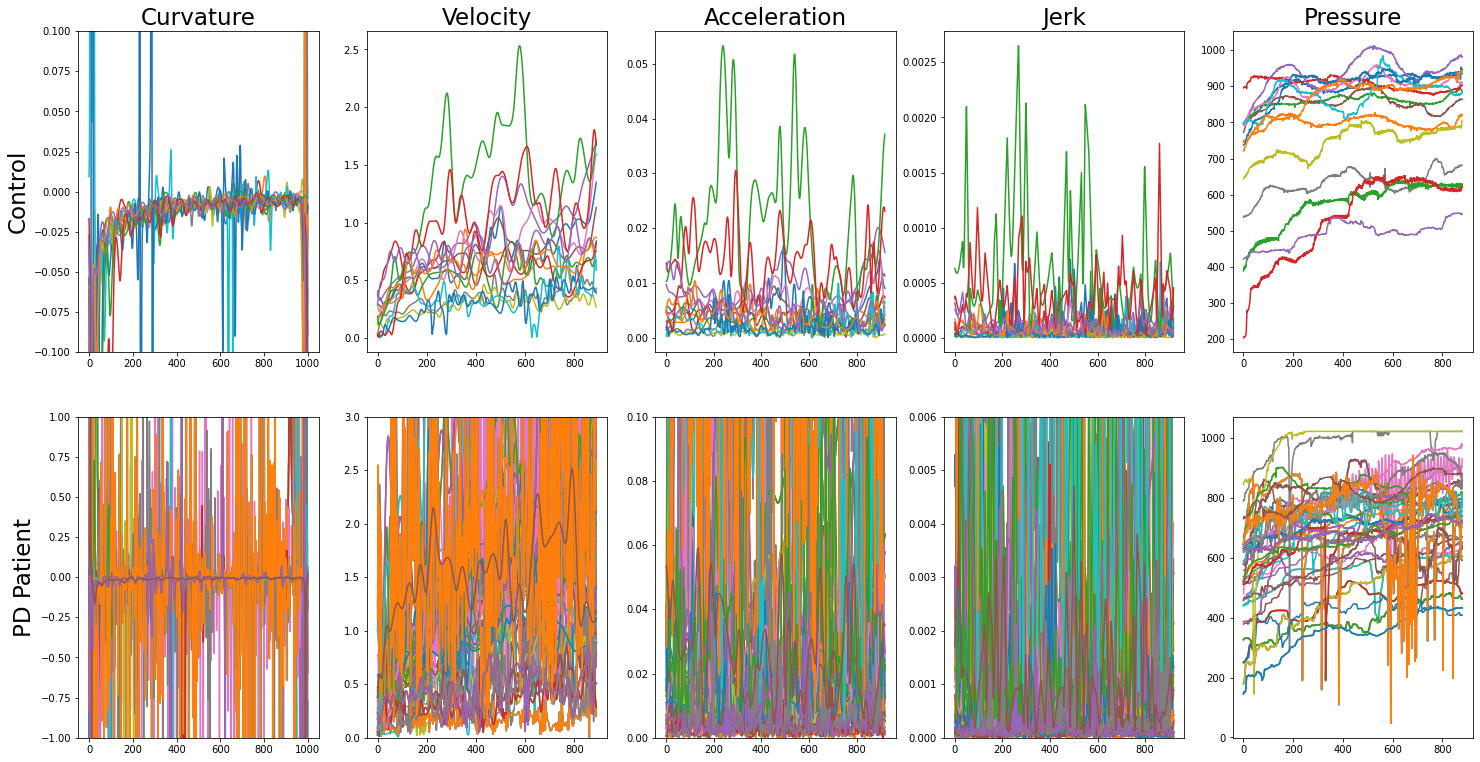

In [ ]:
# figures of velocity, acceleration, jerk and curvature after smoothing 
plt.figure(figsize = (25, 13))

# Control
for i in range(1, 16): 
    if i < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i) + '.txt', sep = ';', header = None)
    df_static = df[(df[6] == 0)]
    x = df_static[0]
    y = df_static[1]
    t = df_static[5]
    curve = np.array([x, y])
    velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n, smoothing_factor)

    velocity = velocity[10: len(velocity)-100]
    acceleration = acceleration[30:len(acceleration)-50]
    jerk = jerk[30:len(jerk)-50]
    pressure = pressure[100: len(pressure)-20]
    
    plt.subplot(2, 5, 1)
    plt.plot(curvature)
    plt.ylim(-0.1, 0.1)
    plt.title('Curvature', fontsize = 23)
    plt.ylabel('Control', fontsize = 23)
    plt.subplot(2, 5, 2)
    plt.plot(velocity)
    plt.title('Velocity', fontsize = 23)
    plt.subplot(2, 5, 3)
    plt.plot(acceleration)
    plt.title('Acceleration', fontsize = 23)
    plt.subplot(2, 5, 4)
    plt.plot(jerk)
    plt.title('Jerk', fontsize = 23)
    plt.subplot(2, 5, 5)
    plt.plot(pressure)
    plt.title('Pressure', fontsize = 23)

# Patients
#plt.figure(figsize = (15, 5))
directory = os.fsencode('/work/ParkinsonHW')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    if filename[0] ==  'H' and int(filename[9:11]) <= 43:
    #if filename[0] == 'P' or filename[0] == 'H': 
        path = os.path.join('/work/ParkinsonHW', filename)
        df = pd.read_csv(path, sep = ';', header = None)
        
        if 0 not in list(df[6]):
            continue
        df_static = df[(df[6]==0)]
        x = df_static[0]
        y = df_static[1]
        t = df_static[5]
        curve = np.array([x, y])
        velocity, acceleration, jerk, curvature, pressure = smoothCurveFeature(curve, n, smoothing_factor)
        '''acceleration = smoothCurveFeature(curve, n, smoothing_factor)[1]
        jerk = smoothCurveFeature(curve, n, smoothing_factor)[2]
        curvature = smoothCurveFeature(curve, n, smoothing_factor)[3]
        pressure = df_static[3]'''
        
        timestamps = df_static[5]

        velocity = velocity[10: len(velocity)-100]
        acceleration = acceleration[30:len(acceleration)-50]
        jerk = jerk[30:len(jerk)-50]
        pressure = pressure[100: len(pressure)-20]

    plt.subplot(2, 5, 6)
    plt.plot(curvature)
    plt.ylabel('PD Patient', fontsize = 23)
    plt.ylim(-1, 1)
    plt.subplot(2, 5, 7)
    plt.plot(velocity)
    plt.ylim(0, 3)
    plt.subplot(2, 5, 8)
    plt.plot(acceleration)
    plt.ylim(0, 0.1)
    plt.subplot(2, 5, 9)
    plt.plot(jerk)
    plt.ylim(0, 0.006)
    plt.subplot(2, 5, 10)
    plt.plot(pressure)

In [ ]:
features_df_static

,Subject ID,Category,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,...,Jerk Std,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std,Rate of Inversion in Pressure
0,C1,0,0.741703,0.213953,1.376681,0.000600,0.000772,0.006822,0.004925,0.034819,...,0.000398,0.003017,0.001654,0.000937,18137,900.403990,906.619046,936.988374,32.218438,0.012792
1,C2,0,0.561856,0.135978,1.030646,0.000326,0.000449,0.003585,0.001899,0.014263,...,0.000080,0.000622,0.001264,0.000693,24521,797.728963,797.026365,827.263664,17.249718,0.009951
2,C3,0,0.576393,0.123113,0.880655,0.000291,0.000422,0.003696,0.002393,0.019992,...,0.000206,0.001958,0.001209,0.000591,35559,856.772596,855.861037,881.170685,14.345989,0.006806
3,C4,0,0.614640,0.132637,1.006097,0.000365,0.000518,0.004139,0.002284,0.016273,...,0.000117,0.001339,0.001649,0.000848,21219,908.361163,914.190886,930.836925,15.640649,0.011641
4,C5,0,0.977548,0.294737,1.715694,0.000417,0.000720,0.009541,0.004476,0.032076,...,0.000244,0.002570,0.002232,0.001152,13886,935.546798,937.903803,1012.068821,44.730827,0.016059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P_26060007,1,0.766879,0.394579,2.521991,0.000655,0.000749,0.008158,0.006551,0.048635,...,0.000591,0.005485,0.001782,0.000962,28056,433.666127,453.835593,496.439416,60.849578,0.001711
72,H_P000-0035,1,2.474440,2.008780,17.906847,0.019659,0.009140,0.692307,1.031537,12.584664,...,0.932046,12.821862,0.011287,0.006440,14442,747.664064,768.484842,953.098470,110.298328,0.010040
73,H_p000-0018,1,0.451769,0.166524,0.826703,0.000952,0.000875,0.005636,0.005341,0.039233,...,0.000331,0.002511,0.002312,0.001094,32002,676.000805,672.298528,747.880698,31.140068,0.007562
74,P_23100002,1,0.640608,0.179111,1.188470,0.000340,0.000514,0.004599,0.002638,0.012668,...,0.000138,0.000829,0.001474,0.000754,29174,959.257873,971.041948,1009.106943,38.325740,0.007575


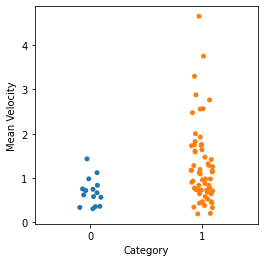

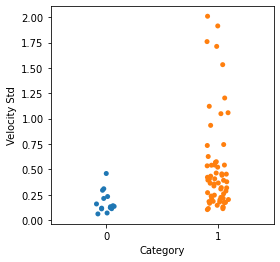

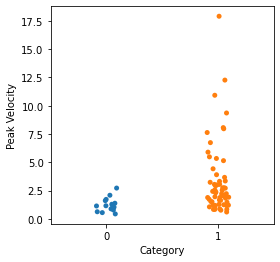

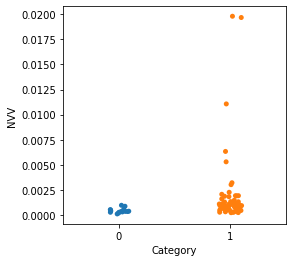

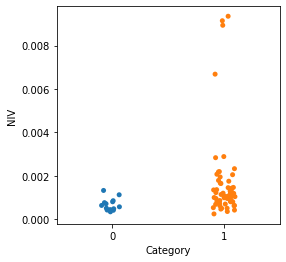

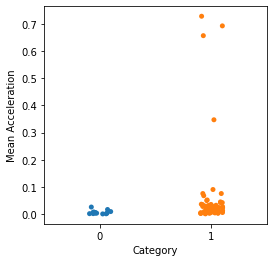

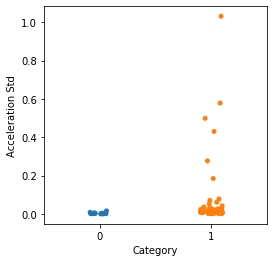

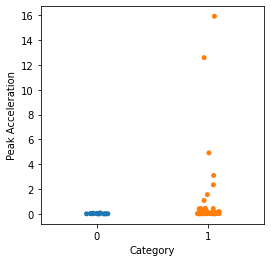

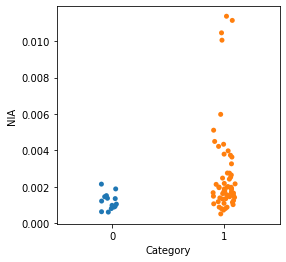

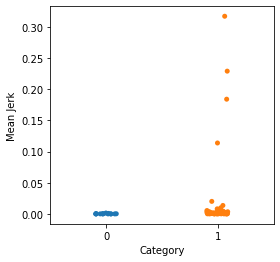

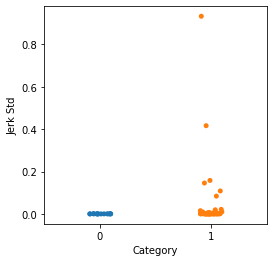

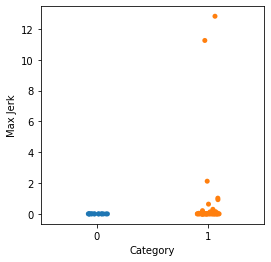

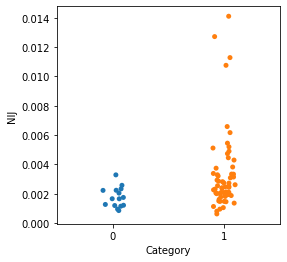

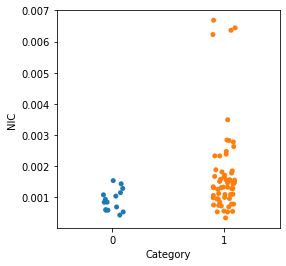

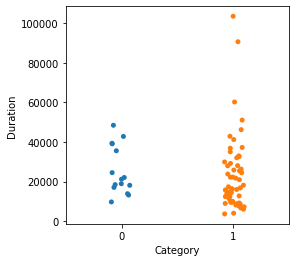

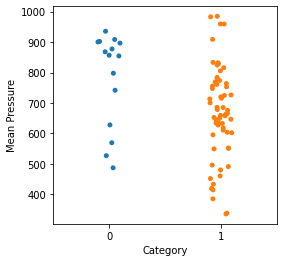

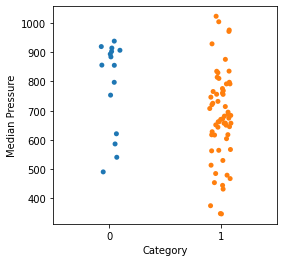

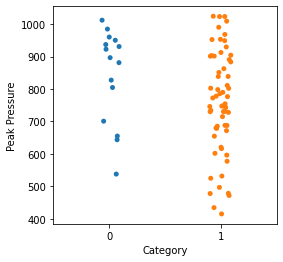

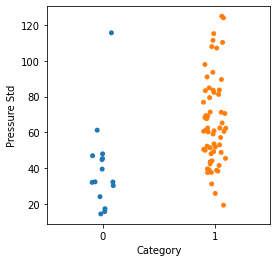

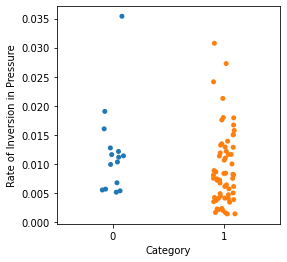

In [ ]:
for i in features_df_static.columns[2:]: 
    plt.figure(figsize = (4, 4))
    #plt.title('Strip Plot of {} vs. Category (0 - Control; 1 - Patient)'.format(i), fontsize = 15)
    sns.stripplot(x = features_df_static['Category'], y = features_df_static[i])

## Feature Selection

In [ ]:
# Not using this anymore
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature_cols = features_df_static.columns[2:].values
Xcols = features_df_static.loc[:, feature_cols]
ycols = features_df_static.Category

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(Xcols,ycols)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xcols.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                            Specs        Score
14                       Duration  3867.019330
15                  Mean Pressure   236.989967
16                Median Pressure   207.197166
18                   Pressure Std   133.466463
17                  Peak Pressure   108.640345
2                   Peak Velocity    18.285192
7               Peak Acceleration    10.815949
11                       Max Jerk     7.386659
0                   Mean Velocity     3.566726
1                    Velocity Std     3.070988
6                Acceleration Std     0.845523
5               Mean Acceleration     0.709649
10                       Jerk Std     0.480738
9                       Mean Jerk     0.230559
3                             NVV     0.016557
8                             NIA     0.011173
12                            NIJ     0.010101
4                             NIV     0.008313
19  Rate of Inversion in Pressure     0.008077
13                            NIC     0.005445


[0.03284216 0.05775833 0.03645452 0.06021867 0.04316942 0.04235119
 0.04827167 0.03064406 0.03425046 0.04398312 0.02548283 0.0276265
 0.04007005 0.0378038  0.04151493 0.08804455 0.07412688 0.0452172
 0.10098163 0.08918803]


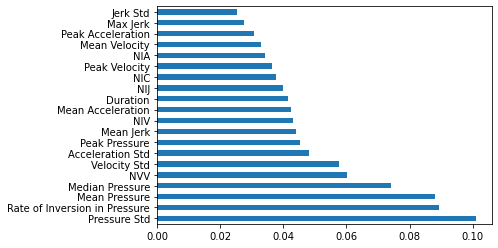

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(Xcols,ycols)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xcols.columns)
#print(feat_importances)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Logistic Regression

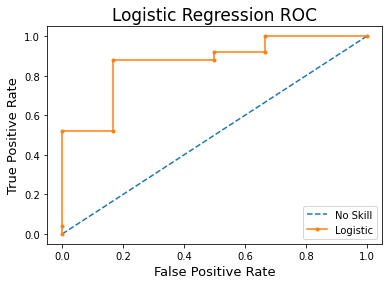

In [ ]:
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve

# 2. instantiate model
feature_cols = features_df_static.columns[2:].values
X = features_df_static.loc[:, feature_cols].values
y = features_df_static.Category.values

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=1000)

logreg = LogisticRegression(solver='lbfgs', max_iter = 1200000)

# 3. fit 
logreg.fit(trainX, trainy)

pred_class = logreg.predict(testX)
pred_probs = logreg.predict_proba(testX)
pred_probs = pred_probs[:, 1]

# 4. calculate scores

# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_log_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate', fontsize = 13)
pyplot.ylabel('True Positive Rate', fontsize = 13)
pyplot.title('Logistic Regression ROC', fontsize = 17)

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
print(model_log_auc)

0.8666666666666667


## SVM

In [ ]:
from sklearn.svm import SVC

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=1)

svclassifier = SVC(kernel='linear', probability = True)

svclassifier.fit(trainX, trainy)

pred_class = svclassifier.predict(testX)
pred_probs = svclassifier.predict_proba(testX)
pred_probs = pred_probs[:, 1]


# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_svc_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate', fontsize = 13)
pyplot.ylabel('True Positive Rate', fontsize = 13)
pyplot.title('SVM', fontsize = 17)

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

KeyboardInterrupt: 

In [ ]:
print (model_svc_auc)

0.8793103448275862


## Different Types of Classifiers

In [ ]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# For reading, visualizing, and preprocessing data
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [ ]:
###############################################################################
#                                 2. Get data                                 #
###############################################################################
# Numpy array to pandas dataframe
feature_cols = features_df_static.columns[2:].values
X = features_df_static.loc[:, feature_cols].values
y = features_df_static.Category.values
X = pd.DataFrame(X, columns = feature_cols)
y = pd.DataFrame(y, columns = ['Category'])

In [ ]:
###############################################################################
#                        3. Create train and test set                         #
###############################################################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 1000)

In [ ]:
###############################################################################
#                               4. Classifiers                                #
###############################################################################
# Create list of tuples with classifier label and classifier object
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"QDA": QuadraticDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"SGD": SGDClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"GNB": GaussianNB()})
classifiers.update({"KNN": KNeighborsClassifier()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})

# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {"Gradient Boosting", "Extra Trees Ensemble", "Random Forest"}

In [ ]:
###############################################################################
#                             5. Hyper-parameters                             #
###############################################################################
# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update({"LDA": {"classifier__solver": ["svd"], 
                                         }})

# Update dict with QDA
parameters.update({"QDA": {"classifier__reg_param":[0.01*ii for ii in range(0, 101)], 
                                         }})
# Update dict with AdaBoost
parameters.update({"AdaBoost": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                 }})

# Update dict with Bagging
parameters.update({"Bagging": { 
                                "classifier__base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "classifier__n_estimators": [200],
                                "classifier__max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                "classifier__n_jobs": [-1]
                                }})

# Update dict with Gradient Boosting
parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        "classifier__n_estimators": [200],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                        "classifier__max_features": ["auto", "sqrt", "log2"],
                                        "classifier__subsample": [0.8, 0.9, 1]
                                         }})


# Update dict with Extra Trees
parameters.update({"Extra Trees Ensemble": { 
                                            "classifier__n_estimators": [200],
                                            "classifier__class_weight": [None, "balanced"],
                                            "classifier__max_features": ["auto", "sqrt", "log2"],
                                            "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                            "classifier__criterion" :["gini", "entropy"]     ,
                                            "classifier__n_jobs": [-1]
                                             }})


# Update dict with Random Forest Parameters
parameters.update({"Random Forest": { 
                                    "classifier__n_estimators": [200],
                                    "classifier__class_weight": [None, "balanced"],
                                    "classifier__max_features": ["auto", "sqrt", "log2"],
                                    "classifier__max_depth" : [3, 4, 5, 6, 7, 8],
                                    "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                    "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                    "classifier__criterion" :["gini", "entropy"]     ,
                                    "classifier__n_jobs": [-1]
                                     }})

# Update dict with Ridge
parameters.update({"Ridge": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with SGD Classifier
parameters.update({"SGD": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0],
                            "classifier__penalty": ["l1", "l2"],
                            "classifier__n_jobs": [-1]
                             }})


# Update dict with BernoulliNB Classifier
parameters.update({"BNB": { 
                            "classifier__alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
                             }})

# Update dict with GaussianNB Classifier
parameters.update({"GNB": { 
                            "classifier__var_smoothing": [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
                             }})

# Update dict with K Nearest Neighbors Classifier
parameters.update({"KNN": { 
                            "classifier__n_neighbors": list(range(1,31)),
                            "classifier__p": [1, 2, 3, 4, 5],
                            "classifier__leaf_size": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                            "classifier__n_jobs": [-1]
                             }})

# Update dict with MLPClassifier
parameters.update({"MLP": { 
                            "classifier__hidden_layer_sizes": [(5), (10), (5,5), (10,10), (5,5,5), (10,10,10)],
                            "classifier__activation": ["identity", "logistic", "tanh", "relu"],
                            "classifier__learning_rate": ["constant", "invscaling", "adaptive"],
                            "classifier__max_iter": [100, 200, 300, 500, 1000, 2000],
                            "classifier__alpha": list(10.0 ** -np.arange(1, 10)),
                             }})

parameters.update({"LSVC": { 
                            "classifier__penalty": ["l2"],
                            "classifier__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
                             }})

parameters.update({"NuSVC": { 
                            "classifier__nu": [0.25, 0.50, 0.75],
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__degree": [1,2,3,4,5,6],
                             }})

parameters.update({"SVC": { 
                            "classifier__kernel": ["linear", "rbf", "poly"],
                            "classifier__gamma": ["auto"],
                            "classifier__C": [0.1, 0.5, 1, 5, 10, 50, 100],
                            "classifier__degree": [1, 2, 3, 4, 5, 6]
                             }})


# Update dict with Decision Tree Classifier
parameters.update({"DTC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

# Update dict with Extra Tree Classifier
parameters.update({"ETC": { 
                            "classifier__criterion" :["gini", "entropy"],
                            "classifier__splitter": ["best", "random"],
                            "classifier__class_weight": [None, "balanced"],
                            "classifier__max_features": ["auto", "sqrt", "log2"],
                            "classifier__max_depth" : [1,2,3, 4, 5, 6, 7, 8],
                            "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                            "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                             }})

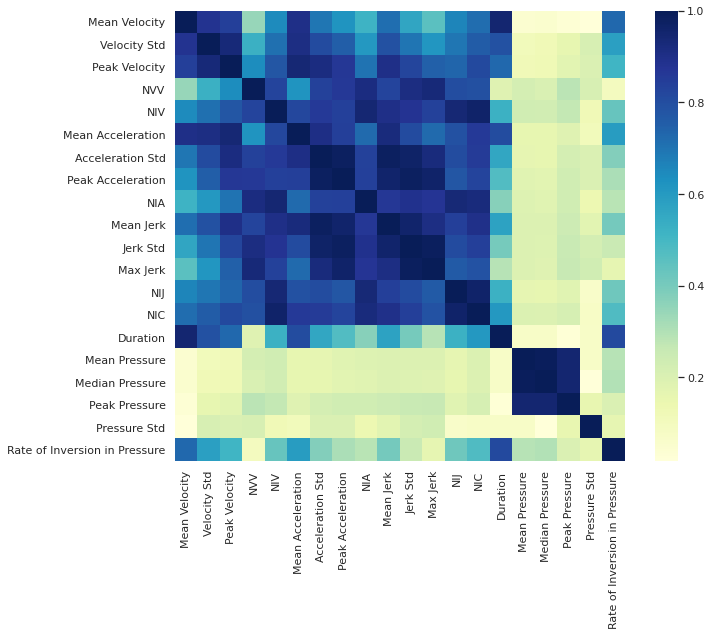

In [ ]:
###############################################################################
#              6. Feature Selection: Removing highly correlated features      #
###############################################################################
# Filter Method: Spearman's Cross Correlation > 0.95
# Make correlation matrix
corr_matrix = X_train.corr(method = "spearman").abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train = X_train.drop(to_drop, axis = 1)
X_test = X_test.drop(to_drop, axis = 1)

In [ ]:
###############################################################################
#                                Base Estimators                              #
###############################################################################
# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {"Gradient Boosting", "Extra Trees Ensemble", "Random Forest"}

In [ ]:
###############################################################################
#                     7. Tuning a classifier to use with RFECV                #
###############################################################################
# Define classifier to use as the base of the recursive feature elimination algorithm
selected_classifier = "Random Forest"
classifier = classifiers[selected_classifier]

# Tune classifier (Took = 4.8 minutes)
    
# Scale features via Z-score normalization
scaler = StandardScaler()

# Define steps in pipeline
steps = [("scaler", scaler), ("classifier", classifier)]

# Initialize Pipeline object
pipeline = Pipeline(steps = steps)
  
# Define parameter grid
param_grid = parameters[selected_classifier]

# Initialize GridSearch object
gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
                  
# Fit gscv
print(f"Now tuning {selected_classifier}. Go grab a beer or something.")
gscv.fit(X_train, np.ravel(y_train))  

# Get best parameters and score
best_params = gscv.best_params_
best_score = gscv.best_score_
        
# Update classifier parameters
tuned_params = {item[12:]: best_params[item] for item in best_params}
classifier.set_params(**tuned_params)

Now tuning Random Forest. Go grab a beer or something.
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 84.0min finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, max_features='log2', min_samples_leaf=0.01,
                       min_samples_split=0.005, n_estimators=200, n_jobs=-1)

In [ ]:
###############################################################################
#                  8. Custom pipeline object to use with RFECV                #
###############################################################################
# Select Features using RFECV
class PipelineRFE(Pipeline):
    # Source: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [ ]:
###############################################################################
#   9. Feature Selection: Recursive Feature Selection with Cross Validation   #
###############################################################################
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFECV object
feature_selector = RFECV(pipe, cv = 5, step = 1, scoring = "roc_auc", verbose = 1)

# Fit RFECV
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting 

In [ ]:
###############################################################################
#                             10. Performance Curve                           #
###############################################################################
# Get Performance Data
performance_curve = {"Number of Features": list(range(1, len(feature_names) + 1)),
                    "AUC": feature_selector.grid_scores_}
performance_curve = pd.DataFrame(performance_curve)

# Performance vs Number of Features
# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})
colors = sns.color_palette("RdYlGn", 20)
line_color = colors[3]
marker_colors = colors[-1]

# Plot
f, ax = plt.subplots(figsize=(13, 6.5))
sns.lineplot(x = "Number of Features", y = "AUC", data = performance_curve,
             color = line_color, lw = 4, ax = ax)
sns.regplot(x = performance_curve["Number of Features"], y = performance_curve["AUC"],
            color = marker_colors, fit_reg = False, scatter_kws = {"s": 200}, ax = ax)

# Axes limits
plt.xlim(0.5, len(feature_names)+0.5)
plt.ylim(0.4, 0.95)

# Generate a bolded horizontal line at y = 0
ax.axhline(y = 0.5, color = 'black', linewidth = 1.3, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("performance_curve.png", dpi = 1080)

AttributeError: 'RFE' object has no attribute 'grid_scores_'

In [ ]:
###############################################################################
#                11. Feature Selection: Recursive Feature Selection           #
###############################################################################
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFE object
feature_selector = RFE(pipe, n_features_to_select = 10, step = 1, verbose = 1)

# Fit RFE
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features labels
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


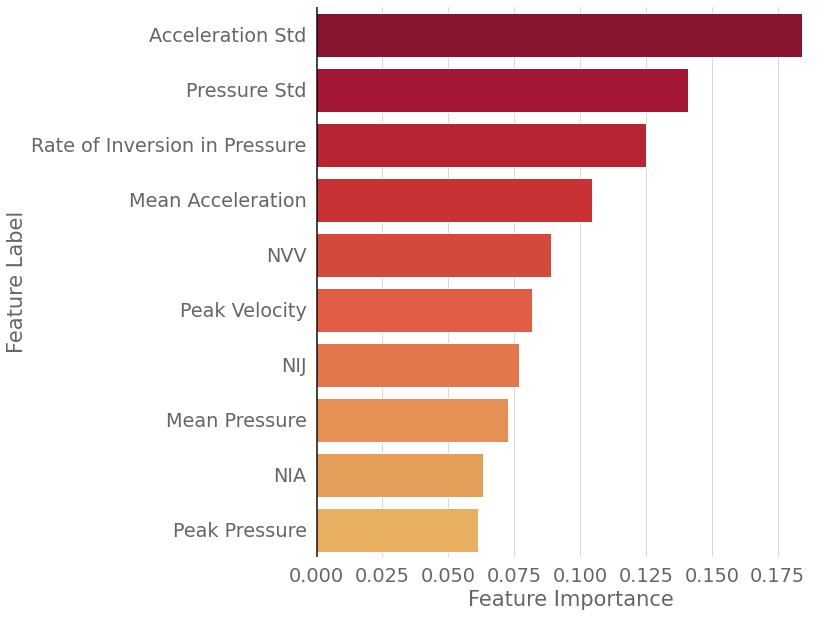

In [ ]:
###############################################################################
#                  12. Visualizing Selected Features Importance               #
###############################################################################
# Get selected features data set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Train classifier
classifier.fit(X_train, np.ravel(y_train))

# Get feature importance
feature_importance = pd.DataFrame(selected_features, columns = ["Feature Label"])
feature_importance["Feature Importance"] = classifier.feature_importances_

# Sort by feature importance
feature_importance = feature_importance.sort_values(by="Feature Importance", ascending=False)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = "Feature Importance", y = "Feature Label",
            palette = reversed(sns.color_palette('YlOrRd', 15)),  data = feature_importance)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("feature_importance.png", dpi = 1080)

In [ ]:
###############################################################################
#                       13. Classifier Tuning and Evaluation                  #
###############################################################################
# Initialize dictionary to store results
results = {}

# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    # Print message to user
    print(f"Now tuning {classifier_label}.")
    
    # Scale features via Z-score normalization
    scaler = StandardScaler()
    
    # Define steps in pipeline
    steps = [("scaler", scaler), ("classifier", classifier)]
    
    # Initialize Pipeline object
    pipeline = Pipeline(steps = steps)
      
    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    gscv = GridSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "roc_auc")
                      
    # Fit gscv
    gscv.fit(X_train, np.ravel(y_train))  
    
    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_
    
    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)
            
    # Make predictions
    if classifier_label in DECISION_FUNCTIONS:
        y_pred = gscv.decision_function(X_test)
    else:
        y_pred = gscv.predict_proba(X_test)[:,1]
    
    # Evaluate model
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Save results
    result = {"Classifier": gscv,
              "Best Parameters": best_params,
              "Training AUC": best_score,
              "Test AUC": auc}
    
    results.update({classifier_label: result})

# Dynamic Drawings

In [ ]:
subject_id = []
mean_vel = []
median_vel = []
max_vel = []
vel_std = []
vel_niv = []
nvv = []
mean_accel = []
max_accel = []
median_accel = []
std_accel = []
nia_accel = []
mean_jerk = []  
max_jerk = []
median_jerk = []
std_jerk = []
nij = []
nic = []
mean_pressure = []
median_pressure = []
max_pressure = []
std_pressure = []
#total_displacement = []
duration = []
category = []

# all the control dynamic drawings
for i in range(1, 16): 
    if i < 10: 
        df = pd.read_csv('/work/ParkinsonHW/C_000' + str(i) + '.txt', sep = ';', header = None)
    else: 
        df = pd.read_csv('/work/ParkinsonHW/C_00' + str(i) + '.txt', sep = ';', header = None)
    df_dynamic = df[(df[6] == 1)]
    x = df_dynamic[0]
    y = df_dynamic[1]
    t = df_dynamic[5]
    curve = np.array([x, y])
    velocity = smoothCurveFeature(curve, n, smoothing_factor)[0]
    acceleration = smoothCurveFeature(curve, n, smoothing_factor)[1]
    jerk = smoothCurveFeature(curve, n, smoothing_factor)[2]
    curvature = smoothCurveFeature(curve, n, smoothing_factor)[3]
    pressure = df_dynamic[3]
    timestamps = list(df_dynamic[5])
    
    subject_id.append('C' + str(i))

    mean_vel.append(velocity_mean(velocity))
    median_vel.append(velocity_median(velocity))
    max_vel.append(velocity_max(velocity))
    vel_std.append(velocity_std(velocity))
    vel_niv.append(velocity_niv(velocity))
    nvv.append(velocity_nvv(velocity))

    mean_accel.append(accel_mean(acceleration))
    median_accel.append(accel_median(acceleration))
    max_accel.append(accel_max(acceleration))
    std_accel.append(accel_std(acceleration))
    nia_accel.append(accel_nia(acceleration))

    mean_jerk.append(jerk_mean(jerk))
    median_jerk.append(jerk_median(jerk))
    max_jerk.append(jerk_max(jerk))
    std_jerk.append(jerk_std(jerk))
    nij.append(jerk_nij(jerk))

    nic.append(curvature_nic(curvature))

    duration.append(duration_calc(timestamps))
    #total_displacement.append(total_displacement_calc(displacement))

    mean_pressure.append(pressure_mean(pressure))
    max_pressure.append(pressure_max(pressure))
    median_pressure.append(pressure_median(pressure))
    std_pressure.append(pressure_std(pressure))

    category.append(0)

# all the PD dynamic drawings 
directory = os.fsencode('/work/ParkinsonHW')
for file in os.listdir(directory): 
    filename = os.fsdecode(file)
    if filename[0] == 'P' or filename[0] == 'H': 
        path = os.path.join('/work/ParkinsonHW', filename)
        df = pd.read_csv(path, sep = ';', header = None)
        
        if 1 not in list(df[6]):
            continue
        df_dynamic = df[(df[6]==1)]
        x = df_dynamic[0]
        y = df_dynamic[1]
        t = df_dynamic[5]
        
        curve = np.array([x, y])
        velocity = smoothCurveFeature(curve, n, smoothing_factor)[0]
        acceleration = smoothCurveFeature(curve, n, smoothing_factor)[1]
        jerk = smoothCurveFeature(curve, n, smoothing_factor)[2]
        curvature = smoothCurveFeature(curve, n, smoothing_factor)[3]
        pressure = df_dynamic[3]
        timestamps = df_dynamic[5]
        
        subject_id.append(filename[:-4])

        mean_vel.append(velocity_mean(velocity))
        median_vel.append(velocity_median(velocity))
        max_vel.append(velocity_max(velocity))
        vel_std.append(velocity_std(velocity))
        vel_niv.append(velocity_niv(velocity))
        nvv.append(velocity_nvv(velocity))

        mean_accel.append(accel_mean(acceleration))
        median_accel.append(accel_median(acceleration))
        max_accel.append(accel_max(acceleration))
        std_accel.append(accel_std(acceleration))
        nia_accel.append(accel_nia(acceleration))

        mean_jerk.append(jerk_mean(jerk))
        median_jerk.append(jerk_median(jerk))
        max_jerk.append(jerk_max(jerk))
        std_jerk.append(jerk_std(jerk))
        nij.append(jerk_nij(jerk))

        nic.append(curvature_nic(curvature))

        duration.append(duration_calc(timestamps))
        #total_displacement.append(total_displacement_calc(displacement))

        mean_pressure.append(pressure_mean(pressure))
        max_pressure.append(pressure_max(pressure))
        median_pressure.append(pressure_median(pressure))
        std_pressure.append(pressure_std(pressure))

        # 1 meaning patient data
        category.append(1)

features_df_dynamic = pd.DataFrame({
'Subject ID': subject_id,
'Category' : category,
'Mean Velocity': mean_vel, 'Velocity Std': vel_std, 'Peak Velocity': max_vel, 'NVV': nvv, 'NIV': vel_niv, 
'Mean Acceleration': mean_accel, 'Acceleration Std': std_accel, 'Peak Acceleration': max_accel, 'NIA': nia_accel, 
'Mean Jerk': mean_jerk, 'Jerk Std': std_jerk, 'Max Jerk': max_jerk, 'NIJ': nij, 
'NIC': nic, 
'Duration': duration, 
#'Total Displacement': total_displacement, 
'Mean Pressure': mean_pressure, 'Median Pressure': median_pressure, 'Peak Pressure': max_pressure, 'Pressure Std': std_pressure, 
}) 

(array([  86,  483,  661, 1060, 1221, 1407, 1644, 1879, 2190, 2484, 3005,
       3185, 3412, 3589, 3966, 4144, 4368, 4525, 4671]),)
(array([ 313,  509,  595,  906, 1023, 1185, 1278, 1471, 1880, 2042, 2233,
       2360, 2645, 2827, 2991, 3200, 3402, 3894, 4124, 4368, 4744]),)
(array([ 106,  334,  575,  777, 1266, 1445, 1639, 1758, 1879, 1994, 2121,
       2332, 2492, 2595, 2761, 2952, 3083, 3217, 3377, 3546, 3743, 3871,
       4221, 4488, 4641, 4764]),)
(array([  76,  509,  662,  856, 1252, 1510, 1884, 2078, 2316, 2548, 2748,
       3096, 3247, 3422, 3743, 3899, 4005, 4457, 4644, 4746, 4948]),)
(array([ 370,  956, 1241, 1375, 1651, 2040, 2463, 2844, 3205, 3676, 4464,
       4679]),)
(array([ 322,  679, 1248, 1560, 2018, 2390, 2878, 3149, 3641, 3805, 4257,
       4522, 4697]),)
(array([ 374,  607,  821, 1228, 1393, 1642, 1885, 2288, 2429, 2587, 2742,
       3089, 3277, 3659, 3829, 4214, 4455, 4596, 4802]),)
(array([  50,  200,  308,  427,  542,  630,  743,  799,  834,  897,  958,
       

In [ ]:
features_df_dynamic

,Subject ID,Category,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,...,Mean Jerk,Jerk Std,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std
0,C1,0,0.595046,0.168319,1.133166,0.000626,0.000838,0.005145,0.003314,0.028435,...,0.000150,0.000209,0.001916,0.002117,0.001147,22670,910.966791,938.0,982,83.350049
1,C2,0,0.556302,0.159552,1.059333,0.000714,0.000896,0.004803,0.003199,0.016771,...,0.000159,0.000179,0.001143,0.002006,0.001067,23429,926.910511,971.0,1007,94.649093
2,C3,0,0.521668,0.180438,1.316628,0.000617,0.000712,0.004498,0.004079,0.047702,...,0.000174,0.000248,0.002133,0.001697,0.000930,36541,912.727945,953.0,980,78.160580
3,C4,0,0.625975,0.261397,1.567060,0.000959,0.000965,0.006862,0.009224,0.232481,...,0.000344,0.001275,0.025565,0.002390,0.001241,21761,939.670546,928.0,1023,96.374974
4,C5,0,0.873616,0.309551,1.656355,0.000532,0.000767,0.008555,0.005050,0.047715,...,0.000177,0.000184,0.001438,0.001981,0.001087,15645,953.766637,990.0,1023,88.489533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,H_P000-0040,1,3.164286,1.999002,9.176623,0.003254,0.005038,0.159594,0.106317,0.603546,...,0.018083,0.016133,0.102768,0.010831,0.005038,3970,856.959075,891.0,983,117.385532
68,P_26060007,1,0.658202,0.469963,2.488131,0.000955,0.000896,0.008774,0.009100,0.057028,...,0.000421,0.000581,0.004342,0.002240,0.001172,29014,618.274002,645.0,714,93.023929
69,H_P000-0035,1,2.487650,2.071271,20.619564,0.026562,0.011428,0.612610,0.665862,8.066041,...,0.200966,0.236465,2.204616,0.015930,0.010158,17326,708.251546,728.0,908,95.450339
70,P_23100002,1,1.021080,0.448754,2.372830,0.000522,0.000629,0.013289,0.006721,0.037969,...,0.000317,0.000214,0.001454,0.001742,0.001064,20671,935.983014,966.0,1023,104.515016


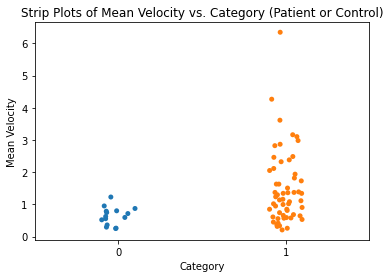

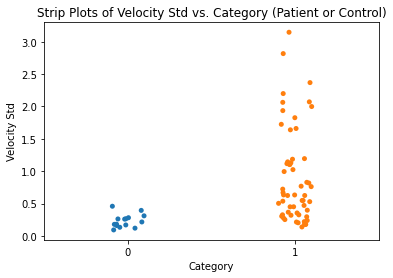

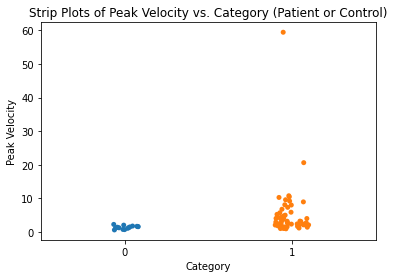

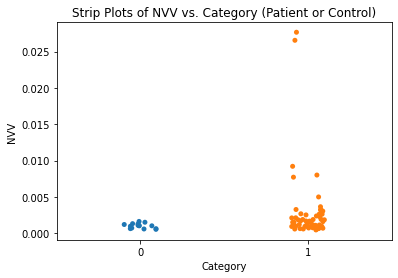

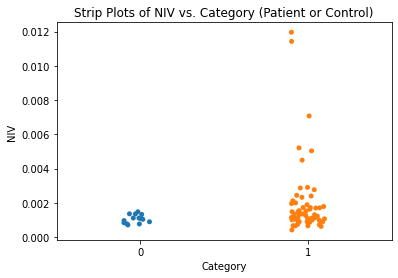

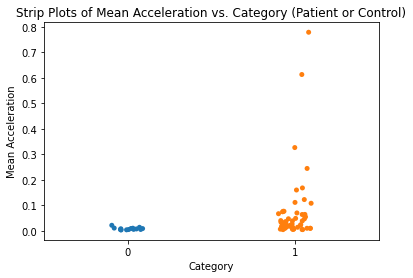

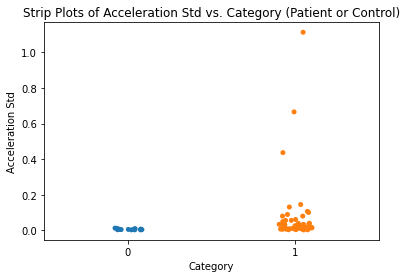

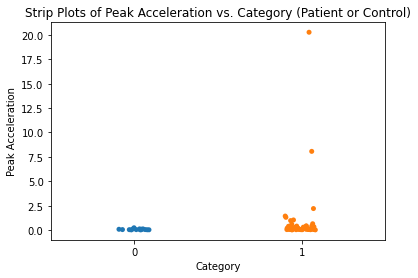

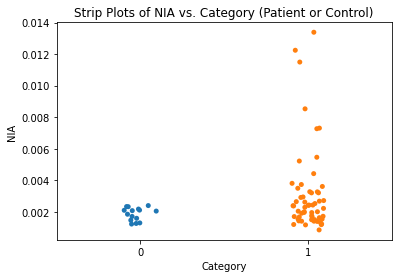

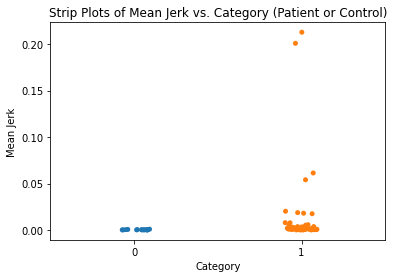

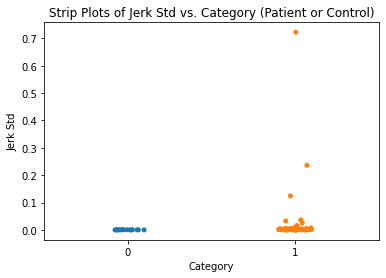

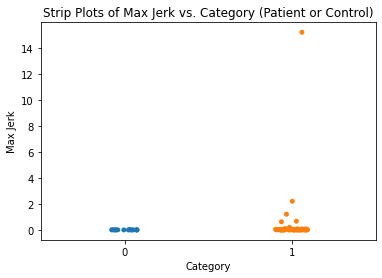

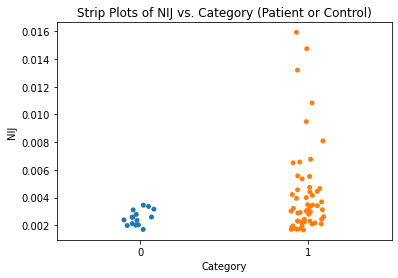

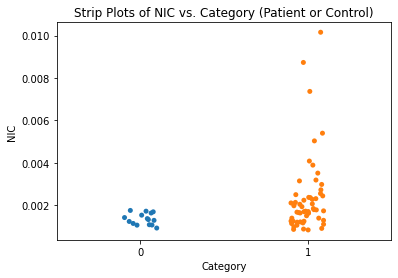

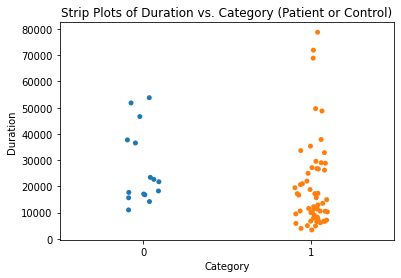

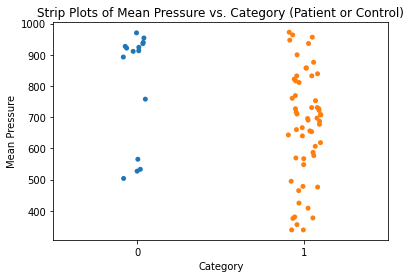

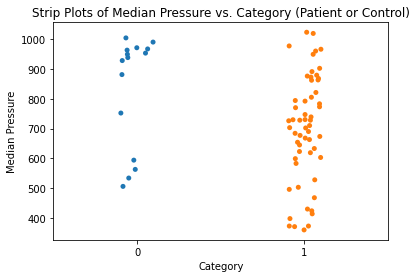

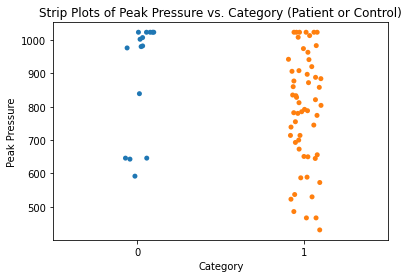

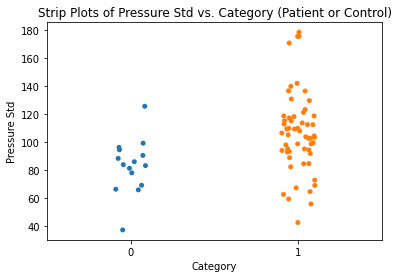

In [ ]:
for i in features_df_dynamic.columns[2:]: 
    plt.figure()
    plt.title('Strip Plots of {} vs. Category (Patient or Control)'.format(i))
    sns.stripplot(x = features_df_dynamic['Category'], y = features_df_dynamic[i])

## Logistic Regression

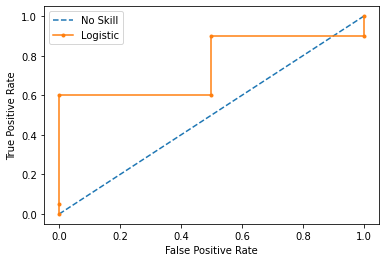

In [ ]:
# 2. instantiate model
feature_cols = features_df_dynamic.columns[2:].values
X = features_df_dynamic.loc[:, feature_cols].values
y = features_df_dynamic.Category.values

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=7)

logreg = LogisticRegression(solver='lbfgs', max_iter = 1200000)

# 3. fit 
logreg.fit(trainX, trainy)

pred_class = logreg.predict(testX)
pred_probs = logreg.predict_proba(testX)
pred_probs = pred_probs[:, 1]

# 4. calculate scores

# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_log_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [ ]:
print (model_log_auc)

0.9827586206896552


In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit(method = 'bfgs')
print(result.summary())
print(model_log_auc)

         Current function value: 0.192801
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 39
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   72
Model:                          Logit   Df Residuals:                       53
Method:                           MLE   Df Model:                           18
Date:                Wed, 06 Jan 2021   Pseudo R-squ.:                  0.6232
Time:                        22:03:34   Log-Likelihood:                -13.882
converged:                      False   LL-Null:                       -36.845
Covariance Type:            nonrobust   LLR p-value:                 0.0003040
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.6415      9.308     -0.821      0.412     -25.884      10.6

## Support Vector Classifier

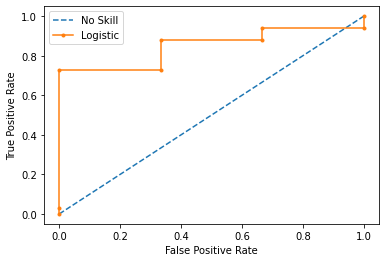

In [ ]:
from sklearn.svm import SVC

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1)

svclassifier = SVC(kernel='linear', probability = True)

svclassifier.fit(trainX, trainy)

pred_class = svclassifier.predict(testX)
pred_probs = svclassifier.predict_proba(testX)
pred_probs = pred_probs[:, 1]


# generate a no skill prediction (majority class)
random_probs = [1 for _ in range(len(testy))]

random_auc = roc_auc_score(testy, random_probs)
model_svc_auc = roc_auc_score(testy, pred_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, pred_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
print(model_svc_auc)

0.8383838383838383
